# Digit Recognition Using SVM

Let's now tackle a slightly more complex problem - digit recognition. We'll first explore the dataset a bit, prepare it (scale etc.) and then experiment with linear and non-linear SVMs with various hyperparameters.


## Data Understanding 

Let's first understand the shape, attributes etc. of the dataset.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [3]:
# dataset
digits = pd.read_csv("train.csv")

In [4]:
# about the dataset

# dimensions
print("Dimensions: ", digits.shape, "\n")

# data types
print(digits.info())

# head
digits.head()

Dimensions:  (42000, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

In [5]:
#sampling 20% of the data for computational efficiency

digits_new = digits.sample(frac=0.2, replace=True, random_state=1)

In [6]:
# about the dataset

# dimensions
print("Dimensions: ", digits_new.shape, "\n")

# data types
print(digits_new.info())

# head
digits_new.head()

Dimensions:  (8400, 785) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8400 entries, 33003 to 11906
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 50.4 MB
None


label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
33003      1       0       0       0       0       0       0       0       0   
12172      1       0       0       0       0       0       0       0       0   
5192       2       0       0       0       0       0       0       0       0   
32511      1       0       0       0       0       0       0       0       0   
7813       7       0       0       0       0       0       0       0       0   

       pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
33003       0    ...            0         0         0         0         0   
12172       0    ...            0         0         0         0         0   
5192        0    ...            0         0         0         0         0   
32511       0    ...            0         0         0         0         0   
7813        0    ...            0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
33003         0         0         0         0         0  
12172         0         0         0         0         0  
5192          0         0         0         0         0  
32511         0         0         0         0         0  
7813          0         0         0         0         0  

[5 rows x 785 columns]

In [8]:
#Null check 
digits_new.isnull().sum()
#No nulls

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [9]:
order = list(np.sort(digits_new['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


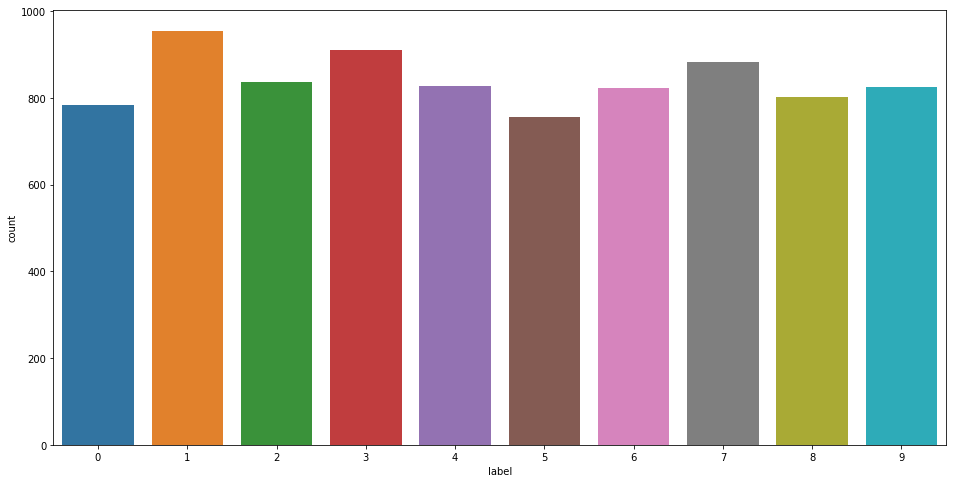

In [10]:
# basic plots: How do various attributes vary with the letters

plt.figure(figsize=(16, 8))
sns.countplot(x="label", data=digits_new)

## Data Preparation

Let's conduct some data preparation steps before modeling. Firstly, let's see if it is important to **rescale** the features, since they may have varying ranges. For example, here are the average values:

In [15]:
# splitting into X and y
X = digits_new.drop("label", axis = 1)
y = digits_new['label']

In [16]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 101)

## Model Building

Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

In [17]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [18]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9107142857142857 

[[171   0   1   0   0   0   2   0   0   0]
 [  0 172   2   0   0   0   0   0   2   0]
 [  0   1 152   2   3   0   2   1   1   0]
 [  3   0  10 168   0   2   0   2   4   3]
 [  3   0   3   0 145   0   2   1   0   6]
 [  0   1   0   8   3 126   0   1   4   1]
 [  3   1   2   0   2   2 129   0   0   0]
 [  1   3   2   1   4   0   0 182   0   7]
 [  1   1   1  10   2   4   5   1 138   2]
 [  2   1   2   0   7   0   0   8   1 147]]


The non-linear model gives approx. 91% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear models.

## Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 3-fold cross validation.

In [19]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 3, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 13.5min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [20]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       90.051793      1.937789        21.094657        0.554370       1   
1       26.221528      0.577039        13.564624        0.456780       1   
2       39.551525      0.198461        17.939845        0.116549       1   
3       88.223744      1.025097        20.663630        0.423776      10   
4       21.882074      0.496718        12.023295        0.395903      10   
5       17.893872      0.429557        11.497905        0.214309      10   
6       88.264074      0.669452        20.455125        0.194426     100   
7       21.854904      0.363804        11.882506        0.159482     100   
8       13.391182      0.283481         9.602770        0.216503     100   
9       88.368934      0.738251        20.787803        0.139636    1000   
10      21.869300      0.412168        11.669059        0.224973    1000   
11      13.458222      0.134974         9.349019        0.216817    1000   

   param_gamma                        params  split0_test_score  \
0         0.01       {'C': 1, 'gamma': 0.01}           0.739732   
1        0.001      {'C': 1, 'gamma': 0.001}           0.919643   
2       0.0001     {'C': 1, 'gamma': 0.0001}           0.883482   
3         0.01      {'C': 10, 'gamma': 0.01}           0.750000   
4        0.001     {'C': 10, 'gamma': 0.001}           0.927232   
5       0.0001    {'C': 10, 'gamma': 0.0001}           0.914286   
6         0.01     {'C': 100, 'gamma': 0.01}           0.750000   
7        0.001    {'C': 100, 'gamma': 0.001}           0.927679   
8       0.0001   {'C': 100, 'gamma': 0.0001}           0.919196   
9         0.01    {'C': 1000, 'gamma': 0.01}           0.750000   
10       0.001   {'C': 1000, 'gamma': 0.001}           0.927679   
11      0.0001  {'C': 1000, 'gamma': 0.0001}           0.907589   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0            0.753571           0.754464         0.749256        0.006744   
1            0.925446           0.929911         0.925000        0.004204   
2            0.895536           0.890179         0.889732        0.004931   
3            0.767857           0.769196         0.762351        0.008751   
4            0.930357           0.943304         0.933631        0.006958   
5            0.924554           0.927232         0.922024        0.005580   
6            0.767857           0.769196         0.762351        0.008751   
7            0.929911           0.941964         0.933185        0.006275   
8            0.923214           0.927679         0.923363        0.003464   
9            0.767857           0.769196         0.762351        0.008751   
10           0.929911           0.941964         0.933185        0.006275   
11           0.918750           0.924554         0.916964        0.007040   

    rank_test_score  split0_train_score  split1_train_score  \
0                12            0.999777            0.999777   
1                 4            0.971875            0.971429   
2                 8            0.909598            0.906473   
3                 9            1.000000            1.000000   
4                 1            0.999777            0.999107   
5                 6            0.962277            0.957812   
6                 9            1.000000            1.000000   
7                 2            1.000000            1.000000   
8                 5            0.998214            0.995313   
9                 9            1.000000            1.000000   
10                2            1.000000            1.000000   
11                7            1.000000            1.000000   

    split2_train_score  mean_train_score  std_train_score  
0             1.000000          0.999851         0.000105  
1             0.968973          0.970759         0.001276  
2             0.910045          0.908705         0.001589  
3             1.000000          1.000000         0.000000  
4             0.99955

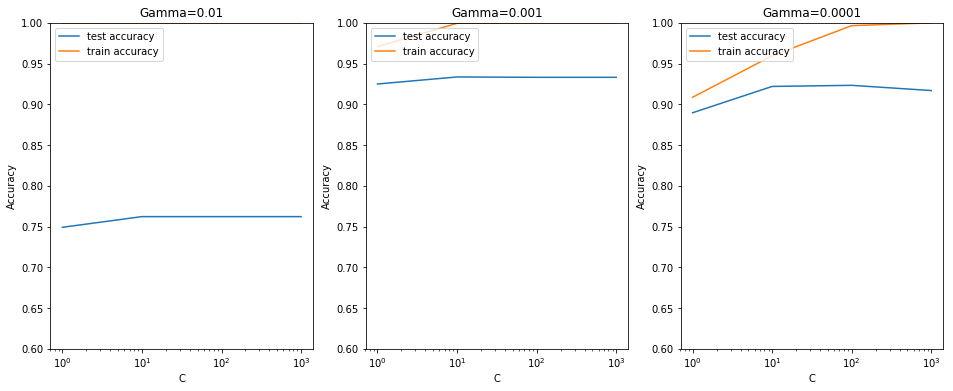

In [21]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


The plots above show some useful insights:
- Non-linear models (high gamma) perform *much better* than the linear ones
- At any value of gamma, a high value of C leads to better performance
- None of the models tend to overfit (even the complex ones), since the training and test accuracies closely follow each other

This suggests that the problem and the data is **inherently non-linear** in nature, and a complex model will outperform simple, linear models in this case.

Let's now choose the best hyperparameters. 

In [22]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9336309523809524 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [23]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
X_test_scaled = scale(X_test)
y_pred = model.predict(X_test_scaled)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")



C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


accuracy 0.9315476190476191 

[[169   0   3   0   0   0   2   0   0   0]
 [  0 171   4   0   0   0   0   0   1   0]
 [  1   1 153   1   1   0   3   1   1   0]
 [  1   0   7 173   0   1   1   3   4   2]
 [  2   0   2   0 150   0   2   1   0   3]
 [  1   0   4   6   1 129   1   1   1   0]
 [  0   1   2   0   0   2 134   0   0   0]
 [  2   5   4   1   2   0   0 183   0   3]
 [  0   0   2   4   2   2   4   0 150   1]
 [  1   1   4   1   3   0   0   5   0 153]] 



## Conclusion

The accuracy achieved using a non-linear kernel (~0.93) is higher than that of a linear one (~0.91). We can conclude that the problem is non-linear in nature.

In [24]:
# dataset for testing from Kaggle
digits_test = pd.read_csv("test.csv")
digits_test.shape

(28000, 784)

In [25]:
#scaling test data
X_test_scaled = scale(digits_test)

#predicting
y_pred = model.predict(X_test_scaled)

In [27]:
#Adding predictions and ID to excel for Kaggle to check accuracy.
final = pd.DataFrame(np.arange(1,28001),columns=['ImageID'])
final['Label'] = y_pred
final.head(25)

ImageID  Label
0         1      2
1         2      0
2         3      9
3         4      4
4         5      3
5         6      7
6         7      0
7         8      3
8         9      0
9        10      3
10       11      5
11       12      7
12       13      3
13       14      0
14       15      4
15       16      3
16       17      3
17       18      1
18       19      9
19       20      0
20       21      9
21       22      1
22       23      1
23       24      5
24       25      7

In [28]:
final.to_csv('final.csv',index=False)